Import Required Libraries

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


sns.set(style="whitegrid")
%matplotlib inline


 Load and Explore Dataset

In [35]:

df = pd.read_csv('Global_Superstore2.csv', encoding='ISO-8859-1')

print("Shape:", df.shape)
df.head()


Shape: (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Data Cleaning

In [36]:

df.drop_duplicates(inplace=True)


print(df.isnull().sum())


df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
df.drop(columns=['Postal Code'], inplace=True)



df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)



Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Sales Trend Over Time

  Order Date     Sales    Profit  Discount
0 2012-07-31  2309.650  762.1845       0.0
1 2013-02-05  3709.395 -288.7650       0.1
2 2013-10-17  5175.171  919.9710       0.1
3 2013-01-28  2892.510  -96.5400       0.1
4 2013-11-05  2832.960  311.5200       0.0


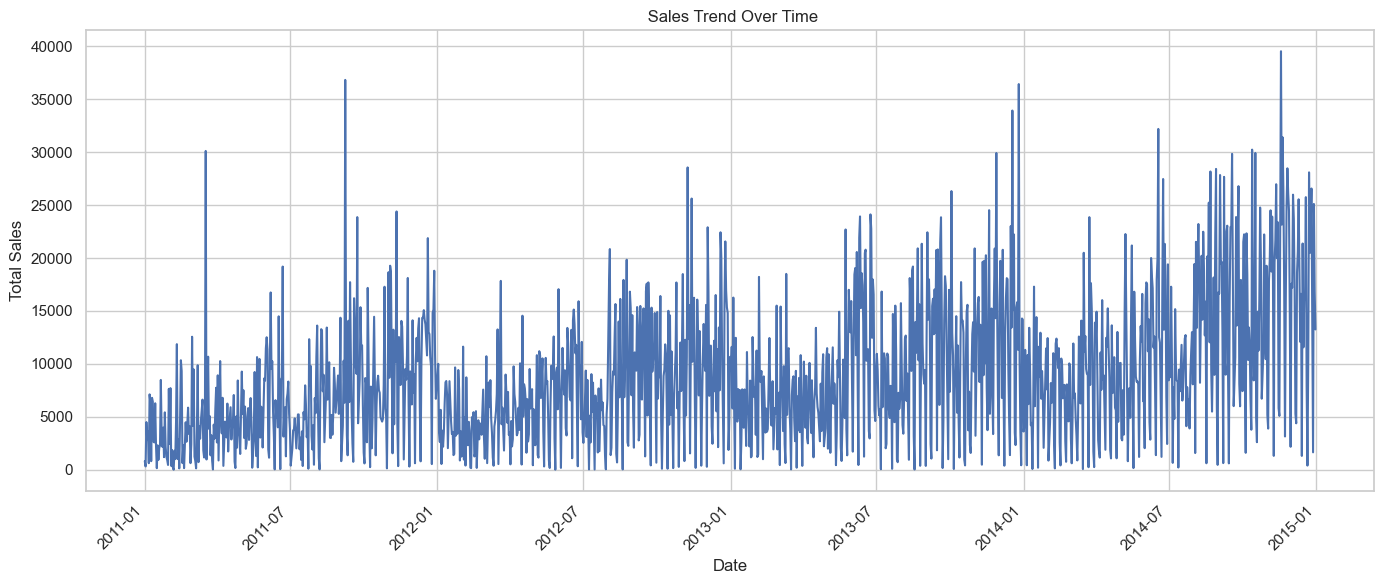

In [37]:

print(df[['Order Date', 'Sales', 'Profit', 'Discount']].head())

sales_trend = df.groupby('Order Date')['Sales'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sales_trend.plot()
plt.title(' Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






Profit vs Discount Scatter

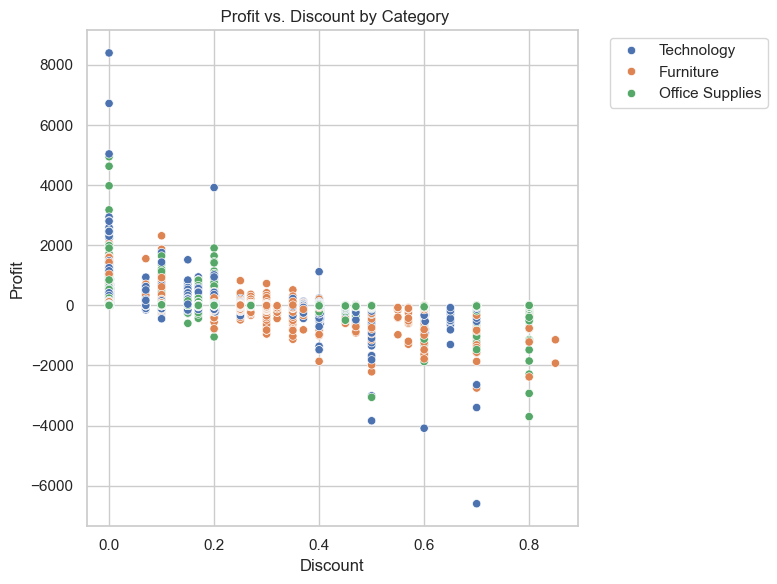

In [38]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title(' Profit vs. Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sales by Region

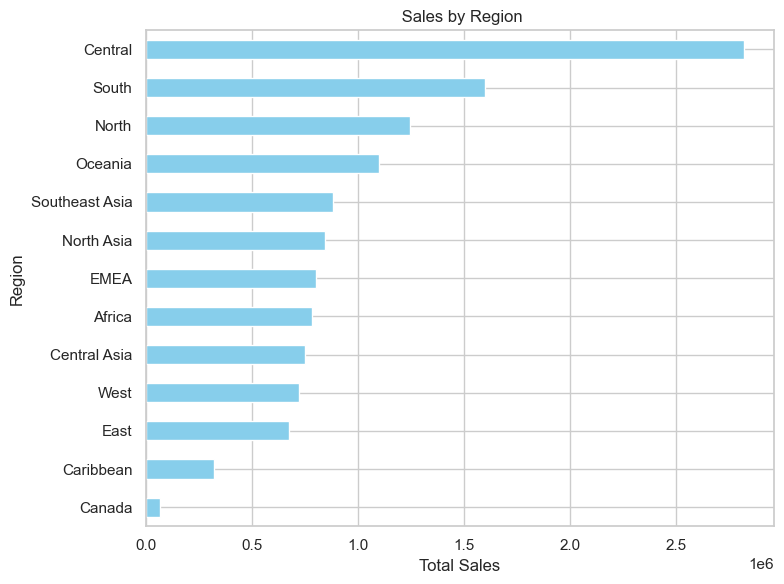

In [39]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8,6))
region_sales.plot(kind='barh', color='skyblue')
plt.title(' Sales by Region')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

Sales by Category 

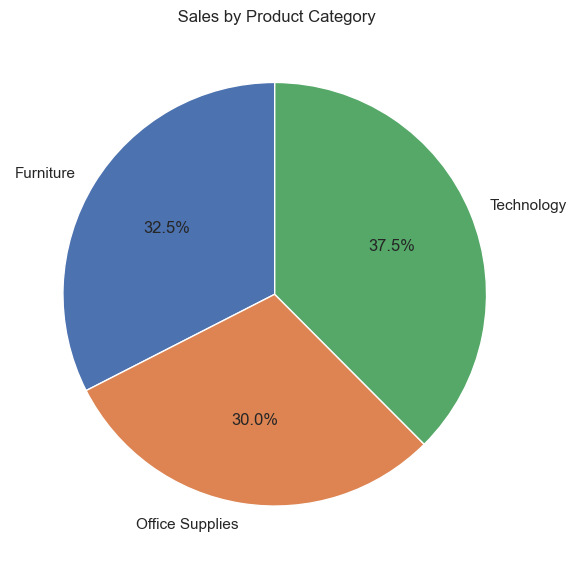

In [40]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title(' Sales by Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

Select Features and Target

In [41]:

X = df[['Profit', 'Discount', 'Quantity', 'Shipping Cost']]

y = df['Sales']


Split into Train and Test

In [42]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train the Linear Regression Model

In [44]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Make Predictions

In [45]:

y_pred = model.predict(X_test)


Evaluate the Model

In [46]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Evaluation:")
print("R² Score:", round(r2, 2))
print("Mean Squared Error:", round(mse, 2))


 Linear Regression Evaluation:
R² Score: 0.68
Mean Squared Error: 71375.99
